INTRODUCTION:

Paramerizing structures underlying publicly tradable instruments utilizing predictive models has obvious monetary rewards. Outside traditional value investing that attempts to predict future directionalities of instruments via economic or business fundamentals, there exists quantitative methods to discern other innate properties between the interplay of buyer vs market and the resultant causal mechanics within market dynamics. These types of algorithms attempt to unearth ‘ghost’ patterns, or unintended emergent properties of the underlying market, that bear repeatable structures that are utilized for accurate prediction. Discovering these these patterns have histories dating back to at least the Dutch Tulip Bubble phenomenon in the 1600s, and this case study is another effort towards this regard.


This case deploys time-series analysis to spot time-dependent patterns for publicly traded markets. In this project, the ARIMA and LSTM (and their variations) models are utlized as frameworks to spot potential underlying patterns in the publicly traded commodity -- gold. Before delving into the specific rationale as to the choice of gold as the studied instrument, let’s provide a cursory overview of the ARIMA and LSTM predictive engines:

CONTEXT AND LIMITATIONS

CONTEXT:

Note: Since I did not major in math, my descriptions of concepts below might not adhere to standard mathematical terminology.

ARIMA stands for AutoRegressive Integrated Moving Average. It is a popular and widely used time-series forecasting model in statistics and econometrics. ARIMA models are employed to render predictions based on past data points in a time-series. These models are particularly useful for capturing and forecasting trends and patterns in time-dependent data.

The acronym, ARIMA, reflects three main components:

- AR (AutoRegressive): The model uses the relationship between an observation and several lagged observations (previous time steps). Essentially, it captures auto-correlation within the time series.

- I (Integrated): The model utilizes differencing of observations (subtracting an observation from the previous observation) to render the time-series stationary. Stationarity is a critical assumption for many time-series models, including ARIMA.

- MA (Moving Average): The model employs the relationship between an observation and a residual error from a moving average model applied to lagged observations. It helps capture the short-term effects or random fluctuations in the time-series.

LIMITATIONS:
ARIMA assumes independent identical datapoints (IID) within a time-series:
However:
1)  Not all time-based datapoints within publicly tradable instruments are necessarily IID- For instance, a time datapoint with no trades has the same parameters as a datapoint with many trades. 
- Also, ARIMA assumes stochastic parameters based on time, but markets may exhibit stochastic-dependent characteristics based on action - i.e. each trade - and not centered over time intervals.
- Similarly, the market may not exhibit stochastic-dependent characteristics over all datapoints (for instance, momentum-trading)
- Likewise, ARIMA assumes stochastic processes in trading dynamics (Efficient Market Hypothesis); However, publicly tradable instruments may not follow stochastic processes for all datapoints

2) ARIMA assumes stationarity:
However:
- Differencing the underlying trend ignores or diminishes the value of that trend within the analysis

3) ARIMA assumes cumulative past time series behavior can predict future behavior. However, in terms of market epistemology, past knowledge may not be indicative of future knowledge
- ARIMA models historical pricing-behaviors based on statistical parameters that are not necessarily consistent over time. 
    - For instance, new information may enter price dyamics at any moment, and thus, a model based on past parameters may become obsolete, and thus, poor determinants of future pricing dynamics. 
    - Essentially, the market is dynamic and evolving: the ecosystem of variables that formulate an ARIMA model - both in reality and statistical representations of reality - may become obsolete at any moment upon introduction of new material information into the market. ARIMA models may not be best suited for dynamic and evolving price dynamics

ARIMA models work well when the underlying relationships in the time series data are linear; ARIMA captures dependencies between observations based on lagged values and past errors.
- However (similar to above, limitations): new information may enter market dynamics at any time, and thus, future datapoints may not depend on past datapoints in a statistically meaningful manner. Furthermore, relationships may not be linear. 

OTHER:
- ARIMA is vulnerable to "black-swan events"
- ARIMA is univariate - it does not incorporate other important factors such as volume
- This ARIMA does not take into account intraday price datapoints or other time-intervals. This model is based on daily prices; there are various other - time increments that may be more applicable, such as minute by minute, or weekly, etc

OVERALL:

As easily discernable, ARIMA is an idealized framing of market causality. However, these idealized parameters do not necessarily reflect market conditions. Identifiying relevant market conditions for ARIMA is a difficult task. 

LSTM:

In short, LSTMs are a specialized type of neural network architecture that remember, learn, and generalize patterns in sequential data, making them particularly valuable for tasks where temporal dependencies play a crucial role.

Advantages over ARIMA:

1. Neural networks are not as linearly deterministic as ARIMA models. They can glean insights from past patterns and generalize patterns into unseen future scenarios. 

2. LSTM is not framed around stochastic modeling, but overall pattern detection, which may offer a more flexible modality to frame market dynamics. This includes offering reasoning capabilities that may filter through the 'noise' of the markets better than ARIMA. 

3. LSTM does not depend on stationary data (the markets are stationary, but instead exhibit drift, momentum, or reversion tendencies)


LSTM constraints:

1. LSTM treats every time datapoint as identically significant (IID) when not every time-based datapoint may be meaningful. Similar to the critique for ARIMA above, perhaps it may be more accurate to treat every action/trade (or other structure) as a datapoint vs daily closing price. Although this issue is alleviated with the logic gates of neural networks.

2. The market may not follow sequential patterns. Instead, markets may follow other 'abstract' forms - i.e. behavioral economics or behavioral finance - that are independent of seqential market data, and thus, may not be captured by LSTM neural networks. 

3. This LSTM only captures daily price data, and omits intraday price points, as well as multitudes of other factors



Decision for Gold as the studied instrument for price dynamic prediction

The optimal instrument for an ARIMA model should characterize the mathematical axioms/assumptions noted above. As such:

1) Individual stocks seem ill suited for an ARIMA model:
With individual stock earnings call incurring once a quarter, IID is not assumed. There is also well-documented (and visualized) drift in most individual stocks, and thus, price dynamics are not stationary. Because stocks react to new information at any data point, linear progression from most recent datapoints may not charaterize the most recent price relationship with most recent past data. Just as importantly, individual stocks are dynamic and evolving, and moving averages and auto-regressive relationships derived from past sample sizes may become outdated determinants of future prices. 

2) Stock ETFs may present as a suitable choice: 
Stock ETFs continuously digest information, where material information is approximately equal value across all datapoints, and thus, exhibit characteristics more closely aligned with IID. Thus, ETFs generally do not exhibit as wide-ranging volatilities and drift as individual stocks. Thus, it is a better approximator of ARIMA mathematical structures. 

3) Gold: 
Similarly to Stock ETFs, Gold’s pricing dynamics and fundamentals continuously digest information, but not merely from socio-economic fundamentals within the US, but the entire global ecosystem. Even more, gold possesses the longest history as a tradable instrument within human economies. Thus, for the wide breadth of variables that underly gold’s pricing dynamics, and its extensive history as documented tradable instrument, gold was chosen for the ARIMA and LSTM model.  





In [143]:
#pip install mplfinance
#pip install tensorflow
#installation of tensorflow and mplfinance modules

In [144]:
#Importing libraries
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
import mplfinance as mpf 
import scipy.stats as stats
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import shapiro

DATA ACQUISITION
- The module Yfinance is utilized below to acquire GOLD's price history

In [145]:
#The symbol for the commodity Gold is GC=F in yahoo finance
#Twenty years of price data will be used for this case study

stock_data = yf.download('GC=F', start='2002-01-01', end='2022-10-05')
print(stock_data.shape)
stock_data.head()


[*********************100%%**********************]  1 of 1 completed
(5212, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,278.899994,278.899994,278.899994,278.899994,278.899994,2
2002-01-03,278.200012,278.200012,278.200012,278.200012,278.200012,2
2002-01-04,278.899994,278.899994,278.899994,278.899994,278.899994,2
2002-01-07,278.600006,279.000000,278.600006,278.600006,278.600006,1
2002-01-08,278.899994,278.899994,278.899994,278.899994,278.899994,1


DATA WRANGLING

In [146]:
#Let's first view the basic characteristics of this time-series data
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000
mean,1114.100845,1119.758135,1108.058059,1113.980199,1113.980199,4545.442441
std,483.337630,486.142518,480.263596,483.247614,483.247614,25276.571184
min,278.100006,278.100006,278.100006,278.100006,278.100006,0.000000
25%,659.099976,660.724991,658.000000,658.975006,658.975006,23.000000
50%,1222.450012,1226.049988,1215.500000,1222.199951,1222.199951,109.500000
75%,1460.025024,1466.449951,1452.774963,1460.175049,1460.175049,405.250000
max,2053.600098,2072.000000,2040.000000,2051.500000,2051.500000,386334.000000


In [147]:
stock_data.shape

(5212, 6)

In [148]:
stock_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [149]:
stock_data.index

DatetimeIndex(['2002-01-02', '2002-01-03', '2002-01-04', '2002-01-07',
               '2002-01-08', '2002-01-09', '2002-01-10', '2002-01-11',
               '2002-01-14', '2002-01-15',
               ...
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-26',
               '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30',
               '2022-10-03', '2022-10-04'],
              dtype='datetime64[ns]', name='Date', length=5212, freq=None)

Note: The dataframe is already in datetime format, so pd.to_datetime() not necessary

In [150]:
stock_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Only one cell of 5212 is null, so unnecessary to impute new values etc

EXPLORATORY DATA ANALYSIS (EDA)

    - Let's explore the characteristics of this commodity via charts and relationships

Plotting data

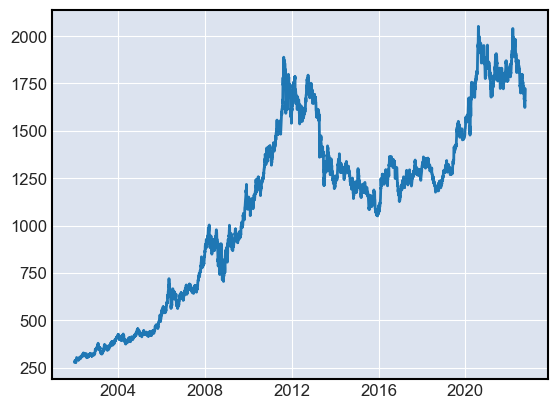

In [151]:
#Let's visualize the price history
plt.plot(stock_data['Close'])
plt.show()

In [152]:
#Below, testing out MPF module for charting candlestick pattern charts with moving averages
mpfstock = stock_data.iloc[:, 0:4]
mpfstock2 = mpfstock.loc['2020-10-01':'2021-01-01']
mpfstock.head()

,Open,High,Low,Close
Date,,,,
2002-01-02,278.899994,278.899994,278.899994,278.899994
2002-01-03,278.200012,278.200012,278.200012,278.200012
2002-01-04,278.899994,278.899994,278.899994,278.899994
2002-01-07,278.600006,279.000000,278.600006,278.600006
2002-01-08,278.899994,278.899994,278.899994,278.899994


Next, let's experiment with the mplfinance library:
- This library is specifically designed for financial data visualization.
- It simplifies plotting candlestick charts, OHLC bars, line plots, and other financial visualizations.
- It includes support for technical indicators (which is useful for most traders), annotations, and customization

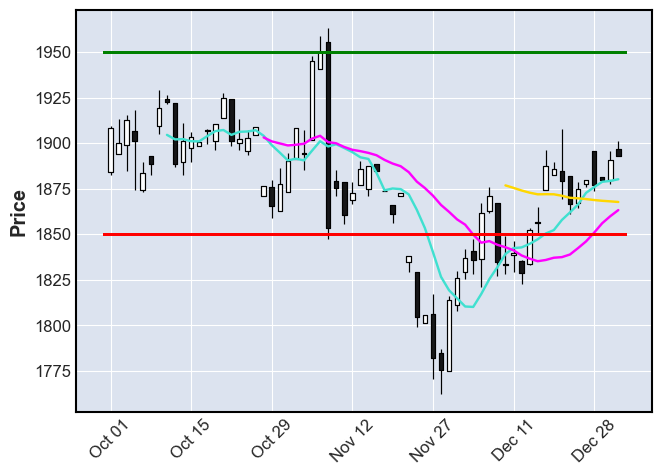

In [153]:
mpf.plot(mpfstock2, type='candle', mav=(8, 20, 50), style='default', hlines=dict(hlines=[1950, 1850], colors=['green', 'red']))

Experimenting with moving averages and moving average cross-overs:

Below, let's experiment with the moving average cross over, which is a fundamental (and maybe antiquated) technique used by technical traders to detect changes in trends of the underlying market. The typical crossover utilized is when the 20 period moving average crosses above the 50 period moving average. This is a signal to BUY the market. The subsequent sell signal is when the 20 MA crosses below the 50 MA. 

There is controversy over the utility of such a simple technique. Nonetheless, let's plot and visualize this momentum-change detection technique onto our gold price chart. 



In [154]:
stock_data['MA20'] = stock_data['Close'].rolling(20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(50).mean()
stock_data = stock_data.dropna()

buy_signals = []
sell_signals = []

for i in range(len(stock_data)):
    if (stock_data['MA20'].iloc[i] > stock_data['MA50'].iloc[i]) and (stock_data['MA20'].iloc[i-1] < stock_data['MA50'].iloc[i-1]):
        buy_signals.append(stock_data.iloc[i]['Close'] * 0.98)
    else:
        buy_signals.append(np.nan)
    
    if (stock_data['MA20'].iloc[i] < stock_data['MA50'].iloc[i]) and (stock_data['MA20'].iloc[i-1] > stock_data['MA50'].iloc[i-1]):
        sell_signals.append(stock_data.iloc[i]['Close'] * 1.02)
    else:
        sell_signals.append(np.nan)


C:\Users\Mark Lee\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




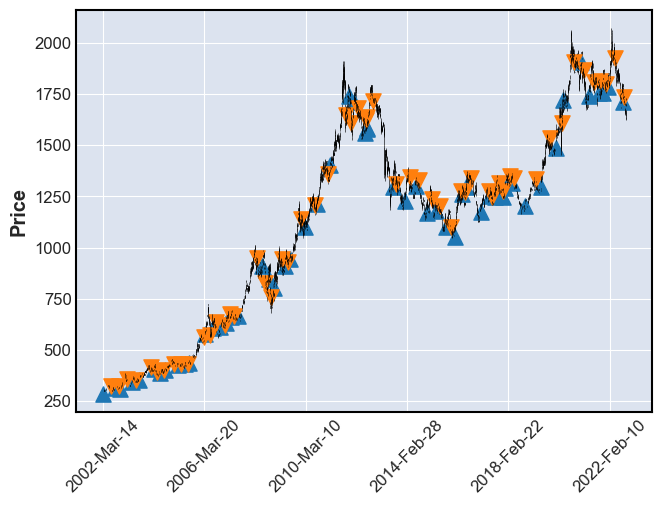

In [155]:

buy_markers = mpf.make_addplot(buy_signals, type='scatter', markersize=120, marker='^')
sell_markers = mpf.make_addplot(sell_signals, type='scatter', markersize=120, marker='v')
apds = [buy_markers, sell_markers]
mpf.plot(stock_data, type="candle", addplot=apds)

Although difficult to visualize, the moving average crossover, surprisingly, produces positive results. Perhaps there are degrees of validity towards utilizing such a simple technique. We should consider examining additional Moving Average (MA) periods, and its variations, through further experimentation.

NORMAL DISTRIBUTION CHARACTERISTICS

The below ARIMA model assumes normal distribution of stock returns. Thus, let's define the characteristics of this normal distribution

Note: Stock market returns may not necessarily follow a normal distribution, but for the purposes of this study, and for use in the ARIMA model, we will assume this curve

In [156]:
#Creating daily percentage returns column
stock_data['pct_change'] = stock_data['Close'].pct_change()

C:\Users\Mark Lee\AppData\Local\Temp\ipykernel_2460\1834879506.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
#Calculating Standard Deviation of normal distribution of stock returns
stock_data['pct_change'].std()

0.011178214023533256

In [158]:
#Plotting the pct_change values

<AxesSubplot:xlabel='Date'>

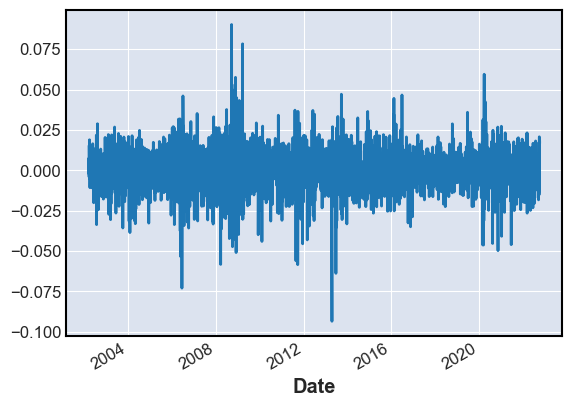

In [159]:
stock_data['pct_change'].plot()

<AxesSubplot:>

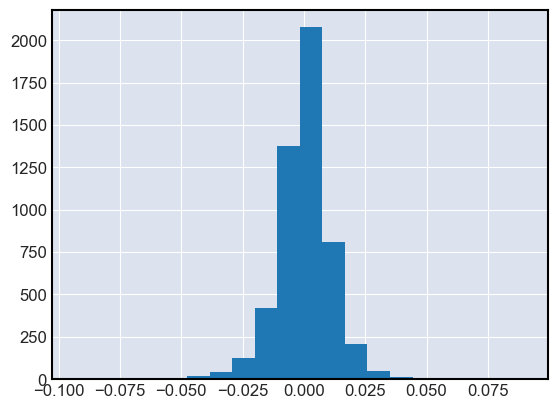

In [160]:
#Plotting the histogram of the pct_change column
stock_data['pct_change'].hist(bins=20)


At least visually, the histogram approximates a normal distribution (although not a perfect normal distribution). It is, indeed, beautiful to witness mathematical causality manifest within reality, including symmetrical causality. 

Note: There is a slight positive skew of this distribution, which reflects the upward drift of Gold during the studied time period

In [161]:
std = stock_data['pct_change'].std()
std3 = std * 3
std3

0.033534642070599766

In [162]:
#Out of curiosity, plotting a chart that shows when prices jump above 3 percent in one day
stock_data['std_sig'] = stock_data['pct_change'] > std3
stock_data['std_sig_neg'] = stock_data['pct_change'] < -std3

C:\Users\Mark Lee\AppData\Local\Temp\ipykernel_2460\2711493214.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mark Lee\AppData\Local\Temp\ipykernel_2460\2711493214.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



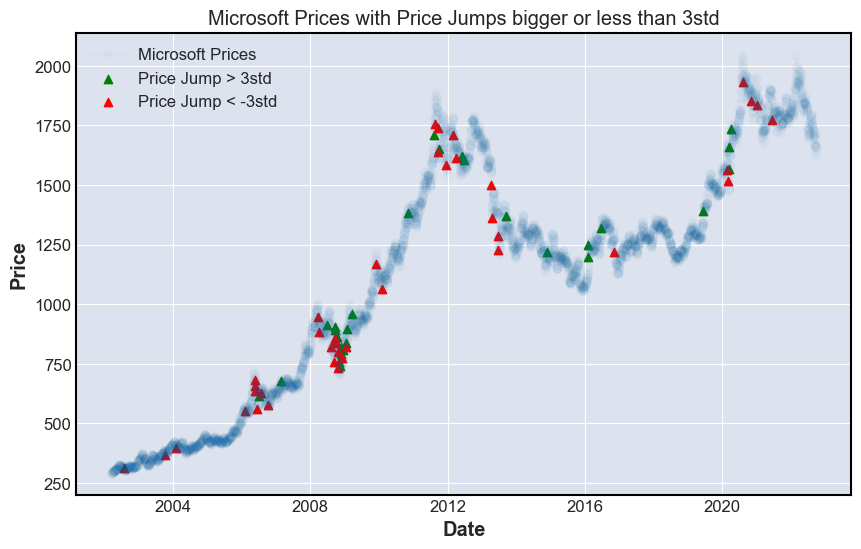

In [163]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Microsoft Prices', marker='o', alpha=.02)

# Overlaying the boolean column indicating price jumps over 5%
std_index = stock_data[stock_data['std_sig']].index
plt.scatter(std_index, stock_data.loc[std_index, 'Close'], color='green', label='Price Jump > 3std', marker='^')
std_index_neg = stock_data[stock_data['std_sig_neg']].index
plt.scatter(std_index_neg, stock_data.loc[std_index_neg, 'Close'], color='red', label='Price Jump < -3std', marker='^')

# Adding labels and legend
plt.title('Microsoft Prices with Price Jumps bigger or less than 3std')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Display the plot
plt.show()

As is easily visualized, it's rare to have price increases above 3 standard deviations (~.03) in one day in this commodity.
- Also of note, these price jumps coincide with the global economic shocks of the 2008 crash and 2020 COVID
- Price 'shocks' of 4 percent or greater, or -4 percent or less, coincide with volatility within the overall economy. A linear directionality determined by price shocks - as in if up 4 percent, buy the stock and vice versa for negative shocks - does not appear to exist. 
- Perhaps further examination of the price action following these price shocks may result in better predictions. 

Moving Averages


In [164]:
#Although moving averages were already plotted using the MPF module, the bootstrap method was conducted below to gain a better understanding of coding
ma_day = [10, 20, 50, 200]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        stock_data[column_name] = stock_data['Close'].rolling(ma).mean()

C:\Users\Mark Lee\AppData\Local\Temp\ipykernel_2460\4289110579.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mark Lee\AppData\Local\Temp\ipykernel_2460\4289110579.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mark Lee\AppData\Local\Temp\ipykernel_2460\4289110579.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Text(0.5, 1.0, 'Gold MA plots')

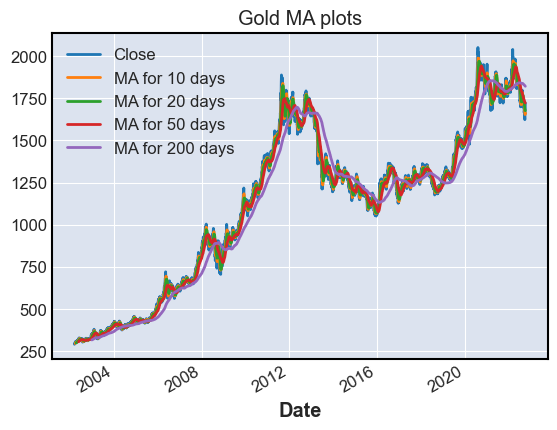

In [165]:
stock_data[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 200 days']].plot()
plt.title('Gold MA plots')

Text(0.5, 1.0, 'Gold MA plots')

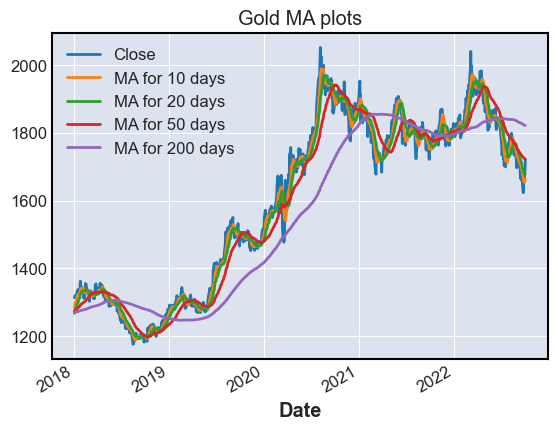

In [166]:
#Plotting for a zoomed in visualization over a shorter time horizon
stock_data[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 200 days']].loc['2018-01-01':].plot()
plt.title('Gold MA plots')

There is an antiquated strategy amongst commmodities traders to 
1) Buy an instrument when its 50 period MA crosses above its 200 MA

2) Sell when the 50 MA crosses below the 200 MA
- Plotting this relationshp and strategy below to discern any validity to this logic

Text(0.5, 1.0, 'Gold MA Strategy')

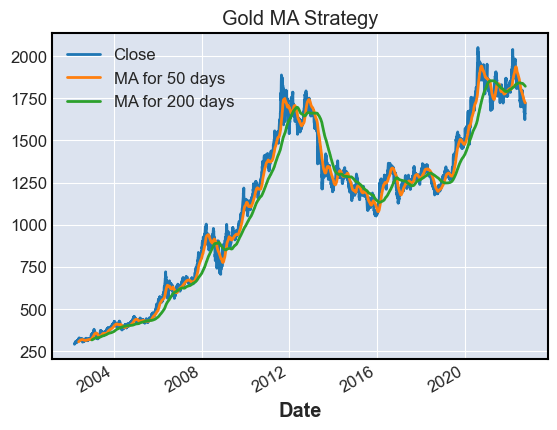

In [167]:
stock_data[['Close', 'MA for 50 days', 'MA for 200 days']].plot()
plt.title('Gold MA Strategy')

This simple strategy carries significance, at least in the specified time period above
- These findings suggest simple technical trading strategies apply for the most basic commodities. This thesis warrants further investigation in the future
- If substantiated, the chart implies this commodity adheres to long term trends or cycles; this aligns logically with the idea that gold prices are intricately tied to economic cycles and patterns
- If valid, the chart implies commodity prices exhibit non-random behavior (not stochastic), and in fact, trends and drift characterize this commodity
- If confirmed via further studies, this chart implies a model framed around stochastics (like ARIMA) is inaccurate for this instrument, at least one performed with these same parameters. Implicitly, the below ARIMA model is unlikely to create an accurate predictive engine for gold prices.

In [168]:
MA = ['MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 200 days']

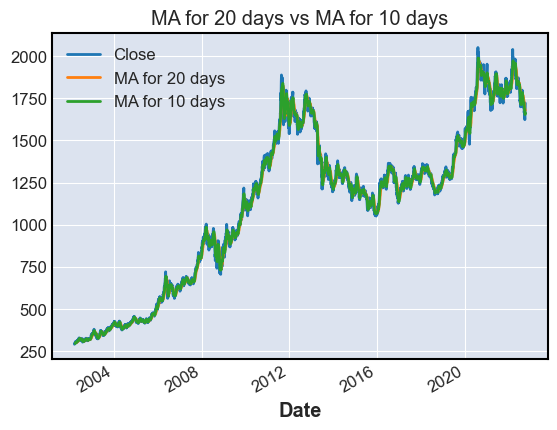

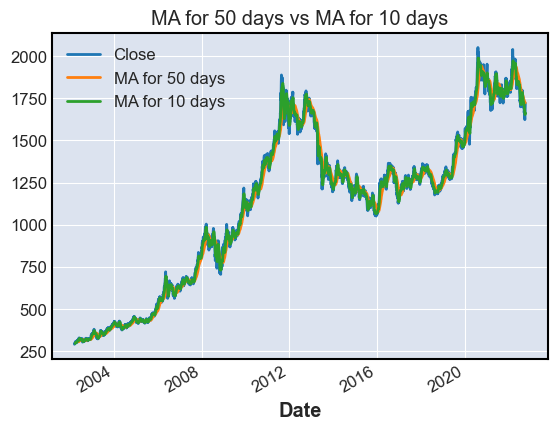

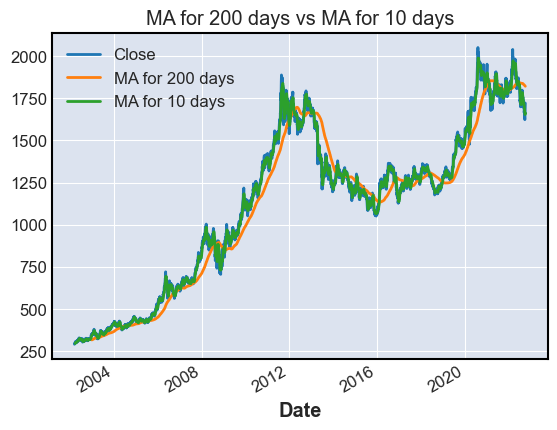

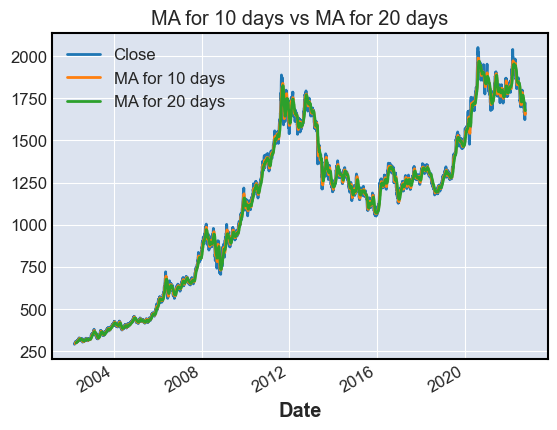

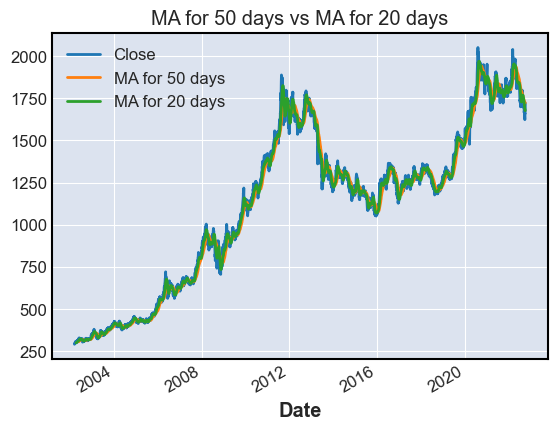

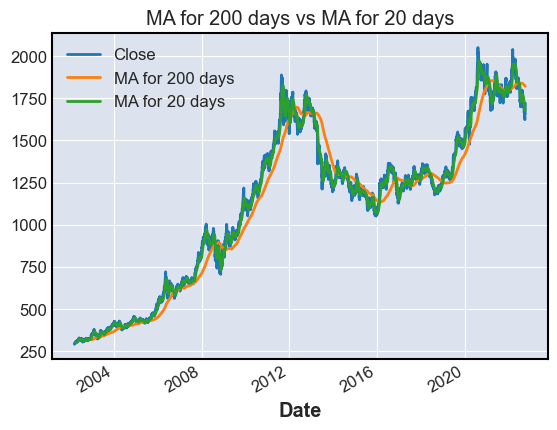

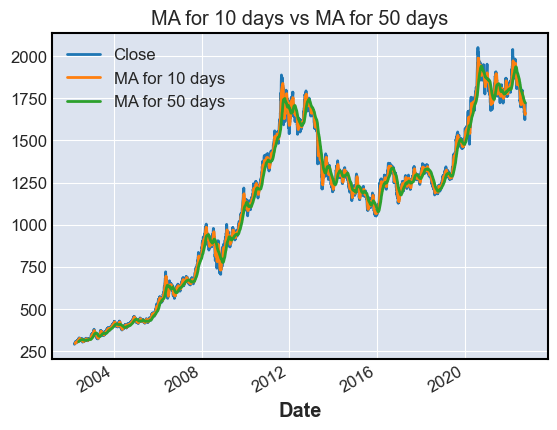

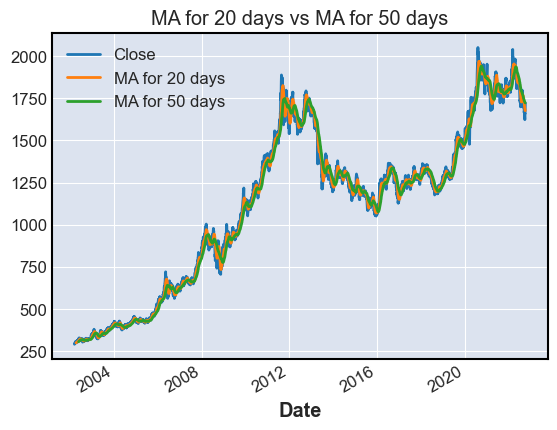

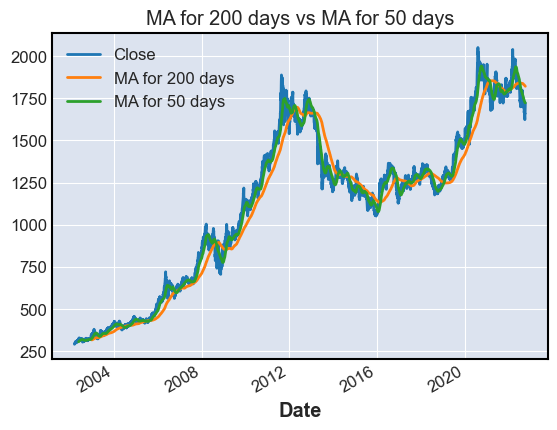

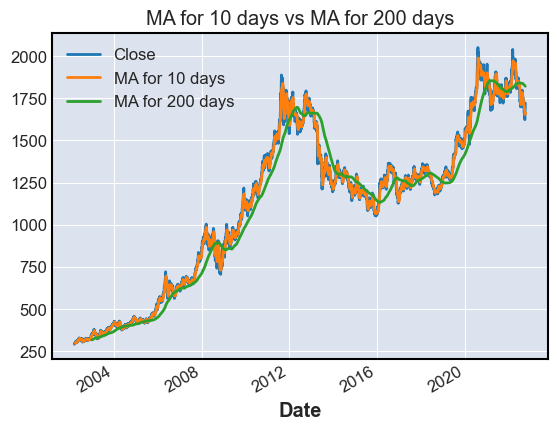

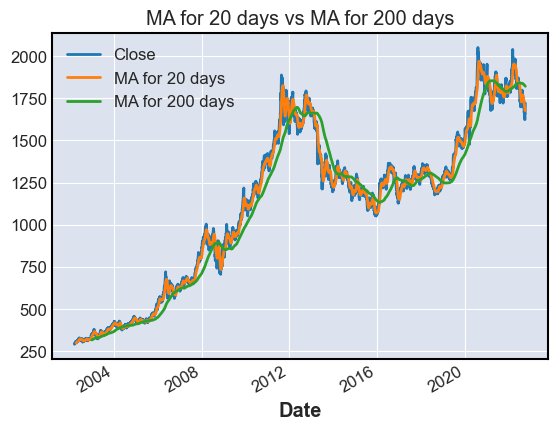

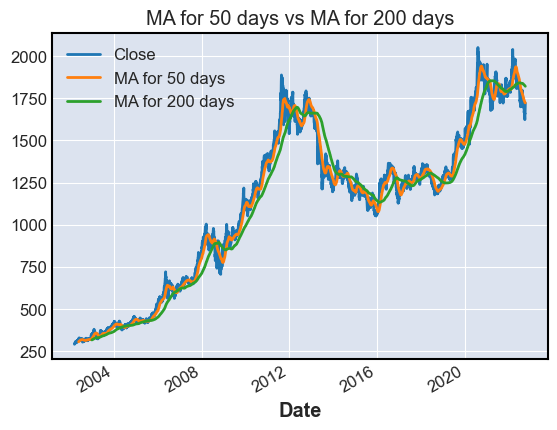

In [169]:
#plotting below the different permutations between MA crossover in this dataframe
for ma in MA:
    for ma2 in MA:
        if ma2 != ma:
            stock_data[['Close',ma2, ma]].plot()
            plt.title(f'{ma2} vs {ma}')
            plt.show()

RANDOM WALK SIMULATION

Below, I am creating a simulation for random walk to test out the stochastic processes in this data:
- Below is a simulation of the last point of gold in the dataframe and projected into the future based on the historical standard deviation
- A simulation is run 10000x to simulate the potential forward projection of a random walk one year into the future for gold
- The simulation shows the boundaries of the random walk
- We will use this simulation for comparision with the eventual ARIMA and LSTM projections

In [170]:
#Creating a function to simulate a random walk 252 trading days (1 year of trading) into the future
def simulate_randomwalk(stock_data):
    price_list = []
    daily_vol_std = stock_data['pct_change'].std()
    T = 252
    last_price = stock_data['Close'].iloc[-1]

    for _ in range(T):
        price = last_price * (1 + np.random.normal(0, daily_vol_std))
        price_list.append(price)
        last_price = price

    return price_list


In [171]:
#Running the simulation function 10000 to simulate a projection
num_simulations = 10000
all_results = []

for i in range(num_simulations):
    result = simulate_randomwalk(stock_data)
    all_results.append(result)

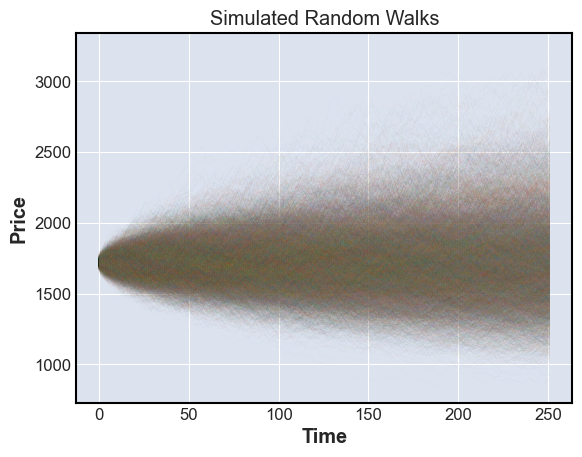

In [322]:
#Plotting the results of the simulation
for i, result in enumerate(all_results):
    plt.plot(result, label=f"Simulation {i + 1}", linewidth=.01, linestyle='dashed')

plt.title('Simulated Random Walks')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

After running the simulation 10000x:
- The upward boundary seems to be around 2500
- The lower floor seems to be arund 1000
- However, this simulation doesn't compute the chances of those scenario transpiring

Below, let's try to compute those percentages

In [173]:

# Initial gold price
initial_price = 1721

# Number of trading days
num_days = 252

# Standard deviation of price changes. I computed this by multiplying .01 x 1121 (mean price of previous 10000x simulation)
std_dev = 11.21

# Confidence level
confidence_level = 0.95

# Calculate the z-score for the confidence level
z_score = np.abs(np.quantile(np.random.standard_normal(size=10000), (1 - confidence_level) / 2))

# Calculate the margin of error
margin_of_error = z_score * std_dev * np.sqrt(num_days)

# Calculate the confidence interval
lower_bound = initial_price - margin_of_error
upper_bound = initial_price + margin_of_error

# Print the confidence interval
print(f"The 95% confidence interval is: [{lower_bound:.2f}, {upper_bound:.2f}]")

The 95% confidence interval is: [1372.83, 2069.17]


According to these statistical measures, gold has a 95% chance of staying between 1371 and 2070 for the next year

NOTE: Future studies should take the log of gold prices, and not just nominal gold prices to take into account inflation and other exponential trends

PRE-PROCESSING AND TRAINING
- Below are the steps necessary to test and prepare the data for the ARIMA and LSTM models (and their variations)

Testing for stationarity

In [174]:

def stationarity(col):
    res = adfuller(col.dropna())
    print("Test Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [175]:
stationarity(stock_data['Close'])

Test Statistic: -1.300812640598069
P-Value: 0.6288004476550455
Non-Stationary


Checking for null values

In [176]:
stock_data['Close'].isna().any()

False

Transforming into stationary series 

<AxesSubplot:xlabel='Date'>

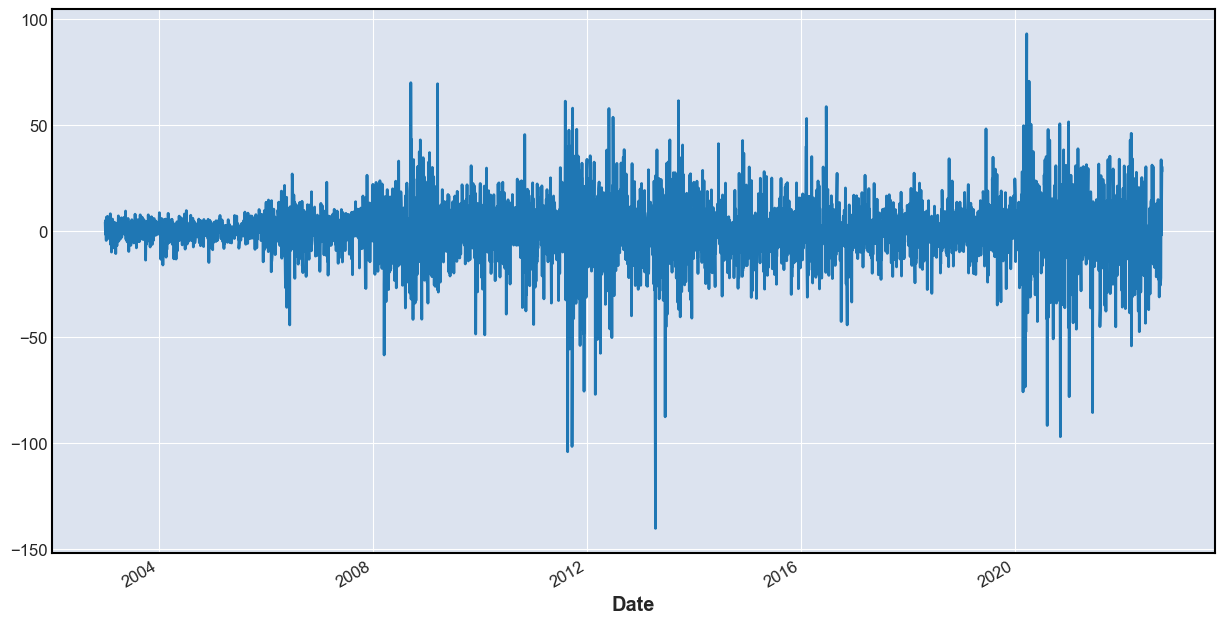

In [177]:
diff_1 = stock_data.diff().dropna()
diff_1_close = diff_1['Close']
diff_1_close.plot(figsize=(15,8))

In [178]:
#Testing for stationarity again
stationarity(diff_1_close)

Test Statistic: -22.037110770370074
P-Value: 0.0
Stationary


Deciding on the Arima models p and q values (partial autoregressive and autoregressive)


In [179]:
#Creating functions to 
def pacf(col):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
    ax1.plot(col)
    ax1.set_title('The Column Diff')
    plot_pacf(col, method='ywm', ax=ax2);
    

def acf(col):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
    ax1.plot(col)
    ax1.set_title('The Column Diff')
    plot_acf(col, ax=ax2);

Plotting the graphs

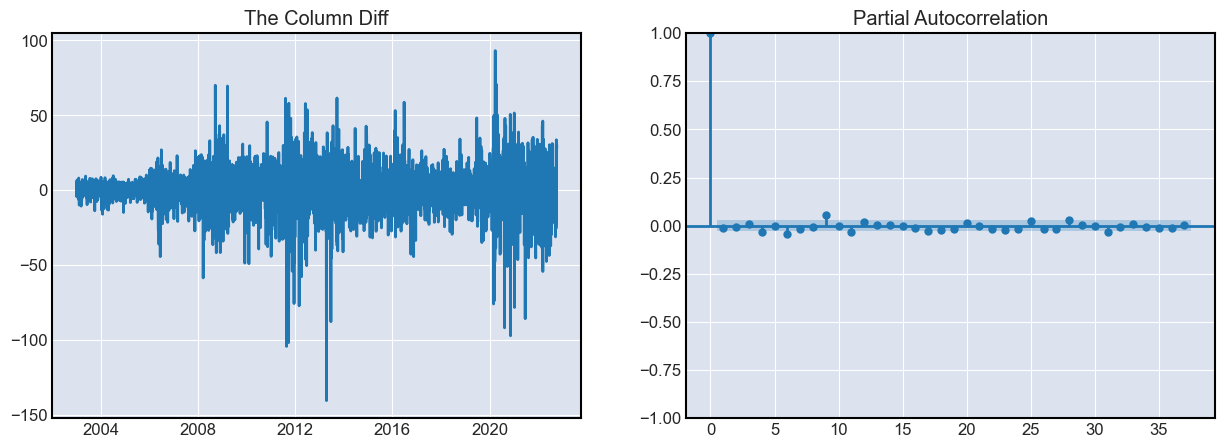

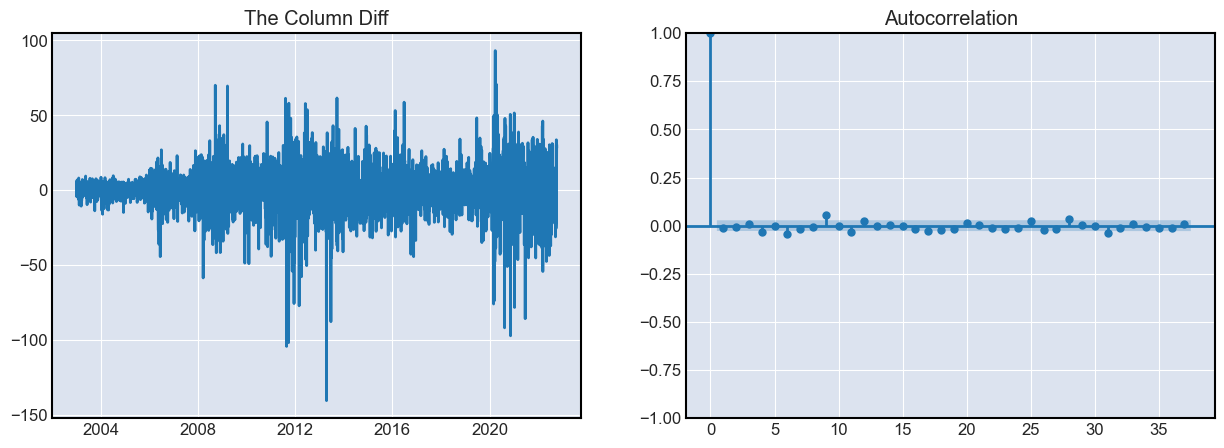

In [180]:
pacf(diff_1_close)
acf(diff_1_close)

Based on the above graphs, the appropriate p value = 0, and the appropriate q value = 0. 
Our resulting ARIMA(0,1,0) model equates to a 'random walk' model


In [181]:
#Below is simply another method to produce the above graphs and conclusions

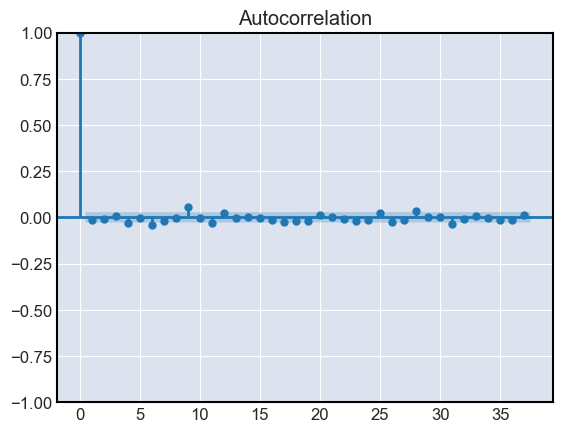

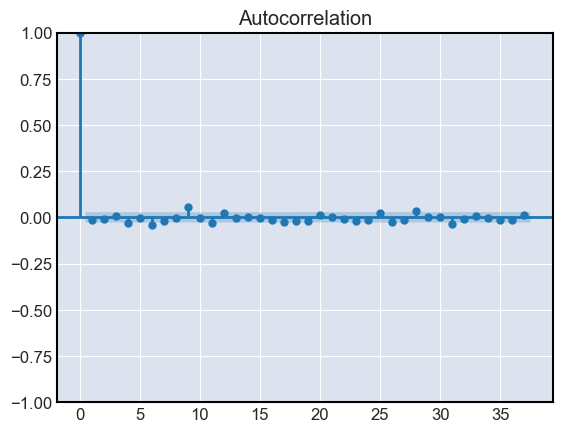

In [182]:
plot_acf(diff_1_close)

Training the model

In [207]:
#Splitting data into train and test sets
train = stock_data.iloc[:-30] # test period of 30 days
test = stock_data.iloc[-30:]
train_idx = stock_data.index <= train.index[-1]
test_idx = stock_data.index > train.index[-1]

In [208]:
#Define and fit the arima model
arima = ARIMA(train['Close'], order=(0,1,0))
arima_res = arima.fit()

C:\Users\Mark Lee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Mark Lee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Mark Lee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



C:\Users\Mark Lee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



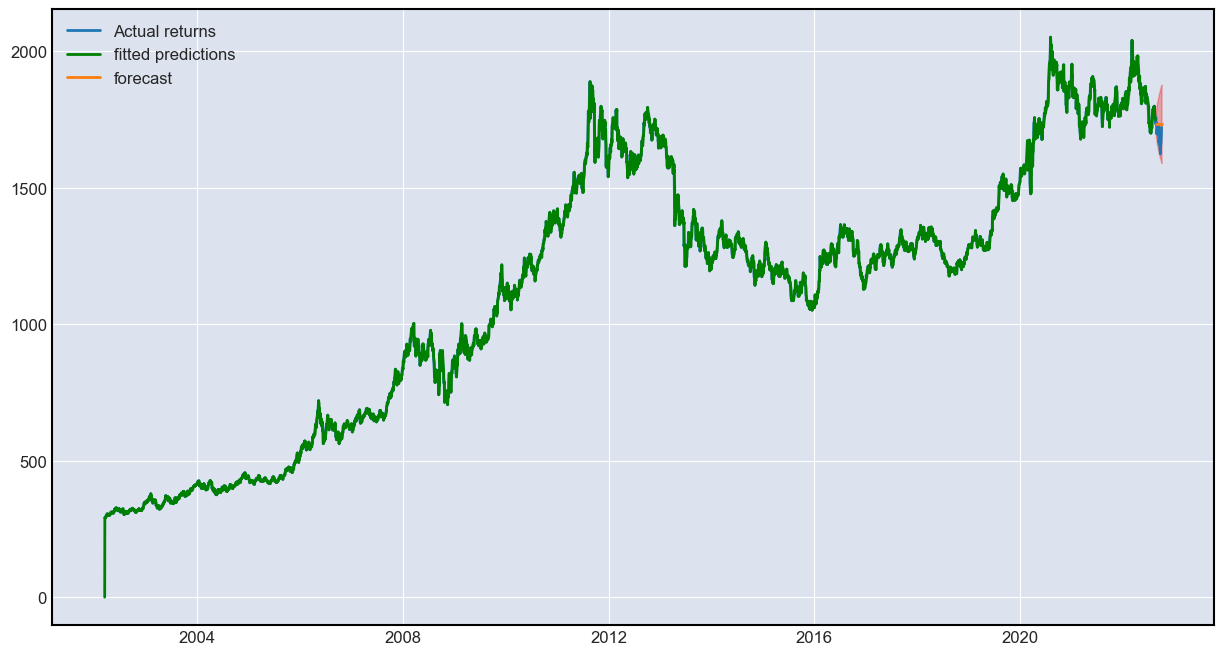

In [209]:
#Plot the real values of stock prices
fig, ax= plt.subplots(figsize=(15,8))
ax.plot(stock_data['Close'], label='Actual returns')
#Plot the fitted values of model (in sample data predicted values)
train_pred = arima_res.fittedvalues
ax.plot(train.index, train_pred, color='green', label='fitted predictions')
    
#Plot the forecast values of model (out of sample data predicted values)
prediction_res = arima_res.get_forecast(30) #30 days of predictions / test
conf_int = prediction_res.conf_int()

#lower and upper limits of prediction 
lower, upper = conf_int[conf_int.columns[0]], conf_int[conf_int.columns[1]]
forecast = prediction_res.predicted_mean
ax.plot(test.index, forecast, label='forecast')
ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
ax.legend()


C:\Users\Mark Lee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



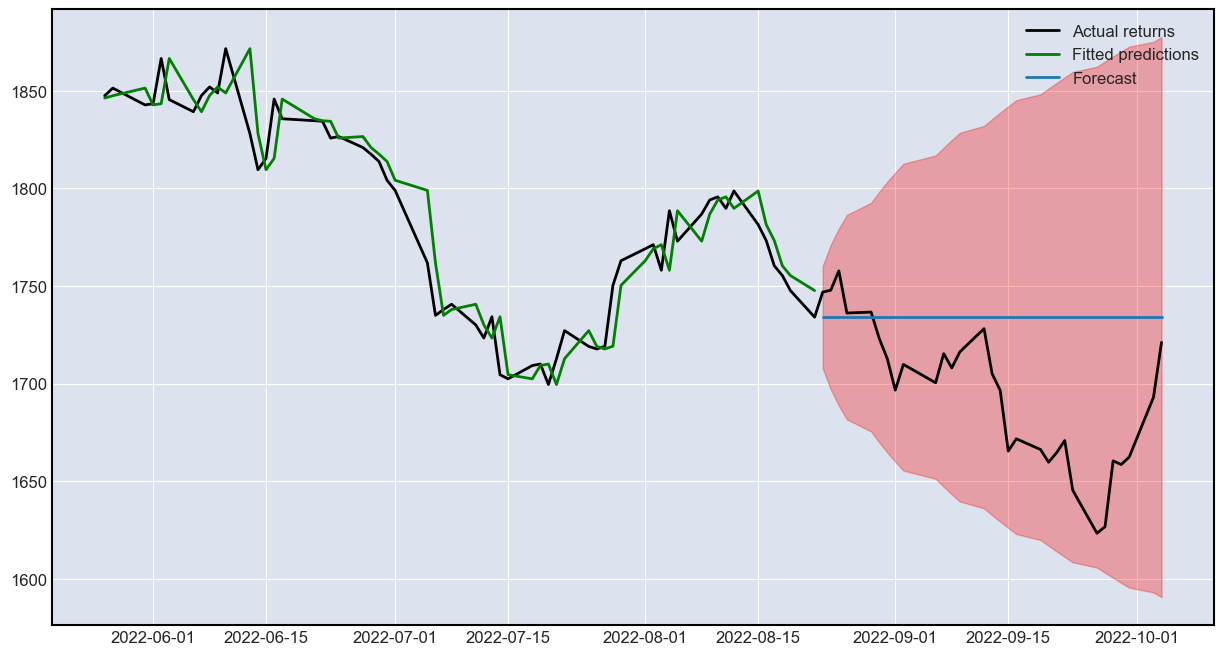

In [250]:
#let's Zoom In  

fig, ax= plt.subplots(figsize=(15,8))
ax.plot(stock_data['Close'].iloc[-90:], color='black', label='Actual returns')

train_pred = arima_res.fittedvalues
ax.plot(train.index[-60:], train_pred[-60:], color='green', label='Fitted predictions')

prediction_res = arima_res.get_forecast(30) #30 days of predictions / test, default = 95% Confidence Interval
conf_int = prediction_res.conf_int()

lower, upper = conf_int[conf_int.columns[0]], conf_int[conf_int.columns[1]]
forecast = prediction_res.predicted_mean
ax.plot(test.index, forecast, label='Forecast')
ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
ax.legend()


In [241]:
#Evaluating the test dataset model using RMSE and MAE metrics
y_true = test['Close'].values
te_rmse = np.sqrt(mean_squared_error(y_true,forecast))
te_mae = mean_absolute_error(y_true,forecast)

In [212]:
rmse, mae

(53.37952273665021, 43.46999918619792)

In [240]:
#Training performance metric
tr_rmse = np.sqrt(mean_squared_error(train['Close'].values,train_pred))
tr_mae = mean_absolute_error(train['Close'].values,train_pred)

In [243]:
tr_rmse, tr_mae

(13.960656842346461, 8.76995869823629)

The performance metric of the train dataset vs prediction:
- RMSE: 13.9
- MAE: 8.76
- Equates to roughly 1% off from actual price for each day predicted, which is not significantly better than 1% std from training dataset's std

The performance metric of the test dataset vs prediction:
- RMSE:  53.37952273665021
- MAE:  43.46999918619792
- This equates to roughly 4% off the actual gold price
- Given that the standard deviation is 1%, this is actually not a spectacular result
- However, this is because the test dataset predicts 30 periods into the future from the last datapont. If ARIMA is utilzed for each successive real datapoint into the future, the performance metric will improve dramatically and align closer to the training model performance



ANALYSIS:
- The empirical results align with the expectations derived during EDA; the mathematical structures defined by ARIMA are not well-suited for stock prediction. 

- Furthermore, in pursuit of positive investment returns, predicting market directionality is also imperative. Even with ARIMA's projected prices, it's difficult to discern when real price is expected to converge with ARIMA's projected price into the future. 
    - Having stated the above, a mean reversion strategy may be worthy of further research.
    - Potential strategy: When ARIMA's calculated price deviates greatly from real price, these are days a trader can buy/sell the stock in expectation it will eventually revert to ARIMA's projected price. Further investigation is necessary to validate this strategy.
    
- As previously noted:  publicly tradable markets are dynamic and evolving equilibriums, and not necessarily IID. Thus, ARIMA is more suited for sinosoidal-esque dynamics - i.e. waves - with more consistently repeatable patterns. 
- However, the 95% confidence interval produced by ARIMA surpasses the simulated random walk's confidence interval; ARIMA may have applications as a risk-management tool.




SARIMAX MODEL
- Perhaps a seasonally adjusted ARIMA model may produce better results

In [185]:
order = (1,1,1)
seasonal_order = (1,1,1,12)

In [253]:
train = stock_data['Close'].iloc[:-30]
test = stock_data['Close'].iloc[-30:]

In [254]:
sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

C:\Users\Mark Lee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Mark Lee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



C:\Users\Mark Lee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



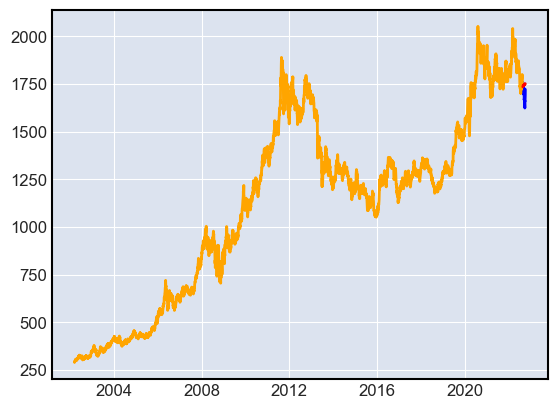

In [188]:
sarima_pred = sarima_fit.forecast(steps=30)
sarima_pred.index = test.index
plt.plot(test, color='blue')
plt.plot(train, color='orange')
plt.plot(sarima_pred, color='red');

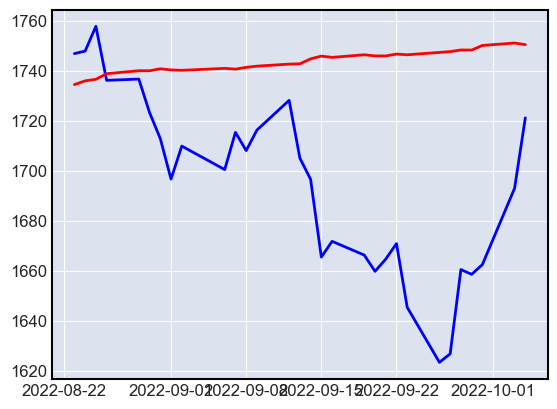

In [189]:
#Zooming In
plt.plot(test, color='blue')
plt.plot(sarima_pred, color='red');

In [190]:
#Evaluating the model using RMSE and MAE metrics
sar_y_true = test.values
sar_rmse = np.sqrt(mean_squared_error(sar_y_true,sarima_pred))
sar_mae = mean_absolute_error(sar_y_true,sarima_pred)

In [191]:
sar_rmse, sar_mae

(62.873322054572725, 52.367366502238596)

SARIMA performance metrics:
- RMSE - 62.87
- MAE - 52.36

The SARIMA did not perform better than the classic ARIMA model

PERFORMING ARIMA ON LOG OF PRICES
- Due to inflation and other exponential trends, the previous ARIMA model is fitted again on the log of gold prices



In [192]:
logp = np.log(stock_data['Close'])

<AxesSubplot:xlabel='Date'>

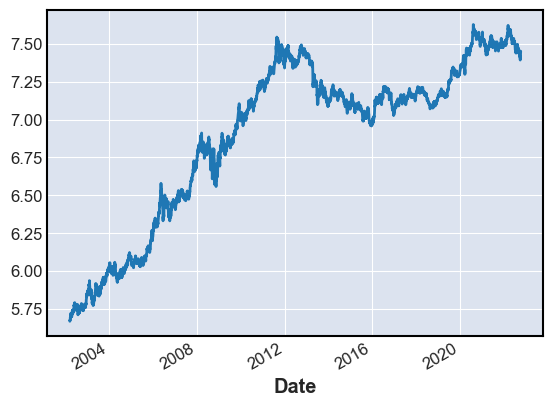

In [193]:
logp.plot()

In [194]:
stationarity(logp)

Test Statistic: -2.114085583152431
P-Value: 0.23888856781371537
Non-Stationary


In [195]:
logp_station = logp.diff().dropna()

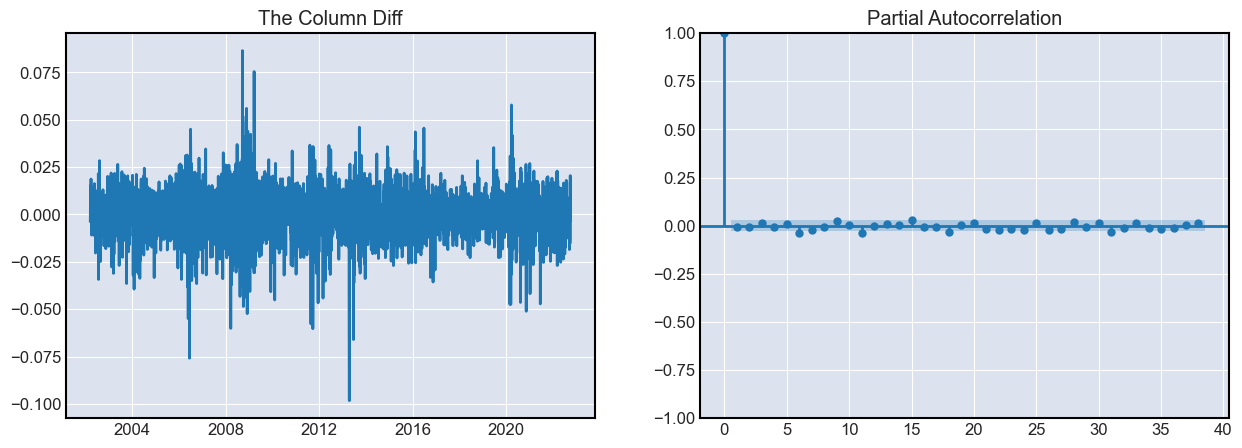

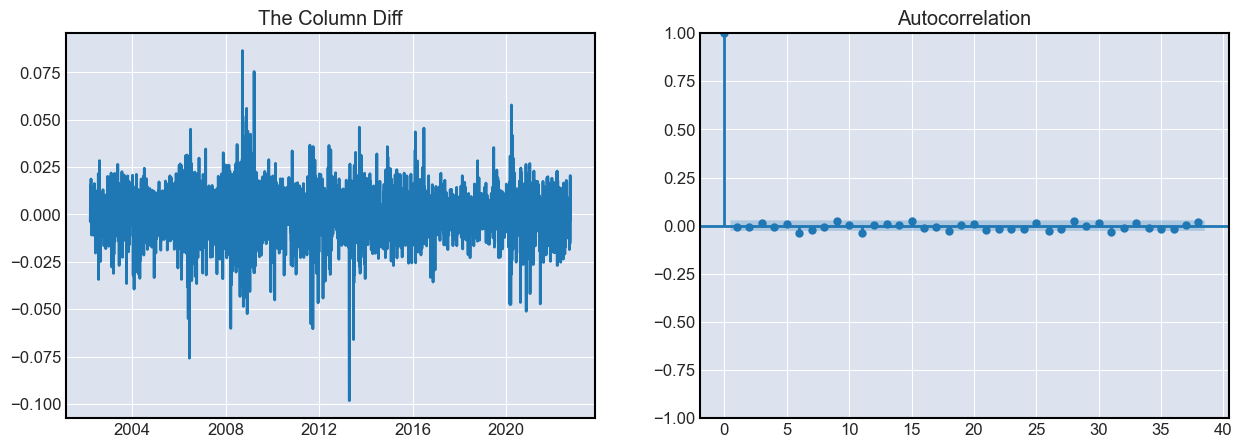

In [196]:
pacf(logp_station)
acf(logp_station)

In [267]:
#Taking natural log of gold prices again
log_stock_prices = np.log(stock_data['Close'])
log_stock_prices.dropna(inplace=True)

In [272]:
#Imputing missing values with bfill
log_stock_prices = log_stock_prices.bfill()

In [273]:
# Ensure the index is in datetime format
log_stock_prices.index = pd.to_datetime(log_stock_prices.index)

# Reindex with a fixed frequency (assuming daily data)
log_stock_prices = log_stock_prices.asfreq('D')


In [329]:
#Splitting train and test datasets
logtrain = log_stock_prices.iloc[:-30]
logtest = log_stock_prices.iloc[-30:]
train_idx = log_stock_prices.index <= logtrain.index[-1]
test_idx = log_stock_prices.index > logtrain.index[-1]


In [330]:
# Fit ARIMA model
order = (0, 1, 0)  # Example order, you may need to adjust based on your data
model = ARIMA(logtrain, order=order)
results = model.fit()


In [331]:
# Forecast future values
forecast_steps = 30  # Example number of forecast steps
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(log_stock_prices.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_values = np.exp(forecast.predicted_mean)  # Unlog the forecasted values


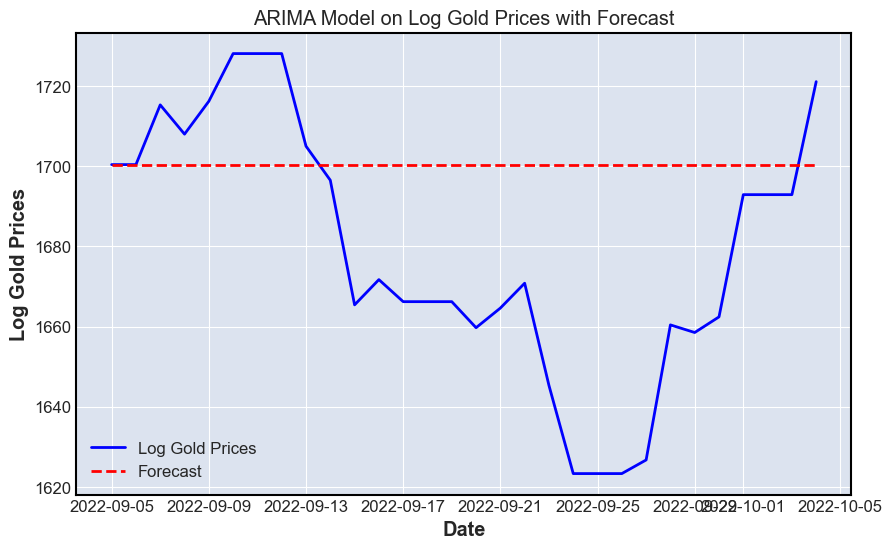

In [332]:
# Plot the original log stock prices and the forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, np.exp(test), label='Log Gold Prices', color='blue')
plt.plot(test.index, forecast_values, label='Forecast', linestyle='dashed', color='red')
plt.title('ARIMA Model on Log Gold Prices with Forecast')
plt.xlabel('Date')
plt.ylabel('Log Gold Prices')
plt.legend()
plt.show()

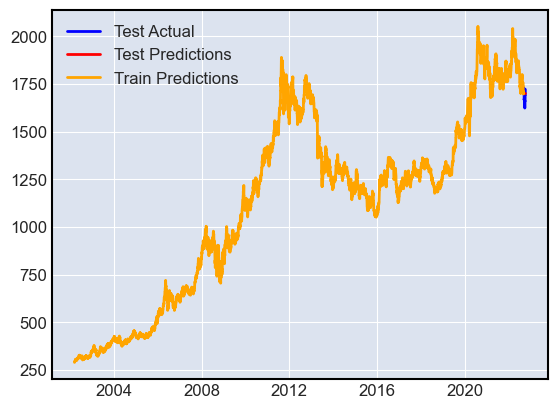

In [334]:
#Plotting the results alongside the training dataset
plt.plot(np.exp(logtest), color='blue', label='Test Actual')
plt.plot(forecast_values, color='red', label='Test Predictions')
plt.plot(np.exp(logtrain), color='orange', label='Train Predictions')
plt.legend()

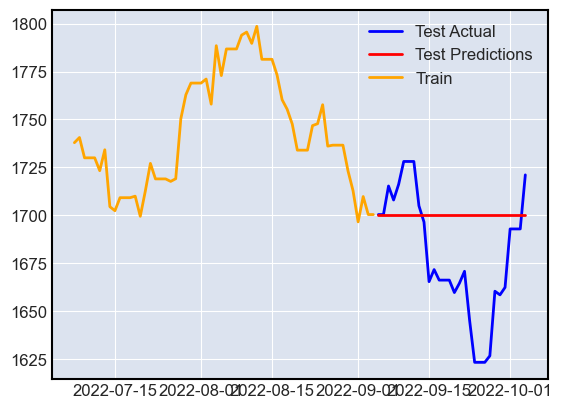

In [344]:
#Zooming in
plt.plot(np.exp(logtest), color='blue', label='Test Actual')
plt.plot(forecast_values, color='red', label='Test Predictions')
plt.plot(np.exp(logtrain).iloc[-60:], color='orange', label='Train')
plt.legend()

In [285]:
# Evaluate the model using RMSE and MAE metrics
loggold_rmse = np.sqrt(mean_squared_error(np.exp(test), forecast_values))
loggold_mae = mean_absolute_error(np.exp(test), forecast_values)

print(f"RMSE: {loggold_rmse}")
print(f"MAE: {loggold_mae}")

RMSE: 38.269807061034605
MAE: 30.85000406901031


After logging the prices, the new error is roughly 3% off the actual price
- Given the std of 1%, this is not a spectacular result
- However, the performance metric received a roughly 30% boost in accuracy after logging the prices to account for exponential trends, such as inflation.


LONG SHORT TERM MEMORY NEURAL NETWORK (LSTM)

In [200]:
#Creating the training dataset
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

In [ ]:
x_train = []
y_train = []

#Creating the new dataset for the neural network
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [201]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [302]:
#Creating the neural nodes / hidden layers of the neural network
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [303]:
#Compiling the model together
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
4071/4071 [==============================] - 96s 22ms/step - loss: 6.5168e-04
Epoch 2/3
4071/4071 [==============================] - 93s 23ms/step - loss: 2.9378e-04
Epoch 3/3
4071/4071 [==============================] - 89s 22ms/step - loss: 2.0533e-04


In [311]:
#Creating predictions
lstm_predictions = model.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


33/33 [==============================] - 1s 30ms/step


In [321]:
#LSTM performance metrics - RMSE and MAE
lstm_rmse = math.sqrt(mean_squared_error(y_test, lstm_predictions))
lstm_rmse

17.185049539220337

In [316]:
mae = mean_absolute_error(y_test, lstm_predictions)
mae

11.97571214779403

In [389]:
#Validating
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = lstm_predictions
train.reset_index(inplace = True)
validation.reset_index(inplace = True)

C:\Users\Mark Lee\AppData\Local\Temp\ipykernel_2460\3723757819.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [390]:
#Plotting the results with plotly go library
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.Date, y=train.Close, mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=validation.Date, y=validation.Close, mode='lines', name='Test Actual Price'))
fig.add_trace(go.Scatter(x=validation.Date, y=validation.Predictions, mode='lines', name='Predicted price'))
fig.update_layout(
        title="Time series Forecasting using LSTM",
        xaxis_title="Date-Time",
        yaxis_title="Values",
        legend_title="Legend",
)
fig.show()

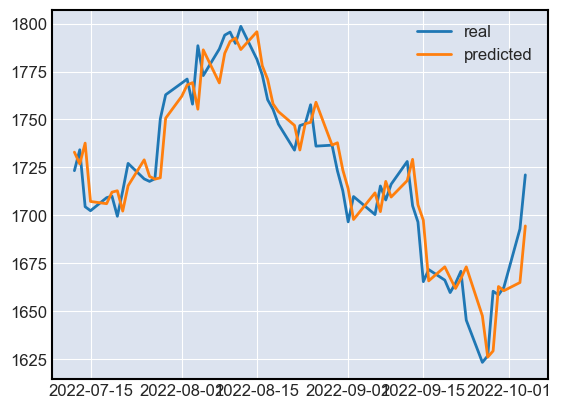

In [423]:
#Zooming in (although plotly can zoom in, just practicing new code)
plt.plot(validation['Date'][-60:], validation['Close'][-60:], label='real')
plt.plot(validation['Date'][-60:], validation['Predictions'][-60:], label='predicted')
plt.legend()


Analysis:
- LSTM produces much better results vs ARIMA
    - This is most likely due to LSTM's 60 period rolling window, and the neural network's ability to generalize (non-linear) insights from within this window for projection into future scenarios.
    - 

The RMSE and MAE are respectively:
17.185049539220337, 11.97571214779403

- LSTM predictions are roughly 1% off the real price, which is roughly to equal the std of the deviations. LSTM does not perform significantly better than std, and thus, is not a valuable predictive model.

- Additionally, similar to ARIMA prediction weakness, it is tough to gauge the directionality of the market with LSTM predictions. LSTM predictions can fluctuate above or below real price, while still mainting these performance metrics. 

- Even more, LSTM seems to be simply a lagging projection that trails the most current price point

Alternative Suggestions:
- Consider utilizing LSTM for 2-5 day projections into the future. If there is a price projection significantly away from current price, it may act as a signal for trader to buy / sell according to those projections. 
- Instead of performing LSTM on prices, perform LSTM on % return from previous day (both neg and pos). It'll be interesting to see if LSTM can accurately predict directionality along with % increase or decrease.
- Overlapping with above, consider LSTM for intraday price prediction with other time parameters. For instance, can LSTM calculate the opening 15-30 minutes of trading and output an accurate direction etc for the rest of the day?
- A plethora of other potential research routes can be explored to more rigorous granularity



In [589]:
#Plotting when preditions > pct_change of 2% and mapping these data points over the real and predicted price chart
#I can't seem to make all the charts show up ....However, in the next section below, plt.scatter and plt.plot works. Why?
fig = go.Figure()
fig.add_trace(go.Scatter(x=selected_indices, y=validation.loc[selected_indices, 'Close'], mode='markers', name='Large Pct Chg'))
fig.add_trace(go.Scatter(x=validation.Date, y=validation.Close, mode='lines', name='Test Actual Price'))
fig.add_trace(go.Scatter(x=validation.Date, y=validation.Predictions, mode='lines', name='Predicted price'))
fig.update_layout(
        title="Time series Forecasting using LSTM",
        xaxis_title="Date-Time",
        yaxis_title="Values",
        legend_title="Legend",
)
fig.show()

C:\Users\Mark Lee\AppData\Local\Temp\ipykernel_2460\2354764741.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



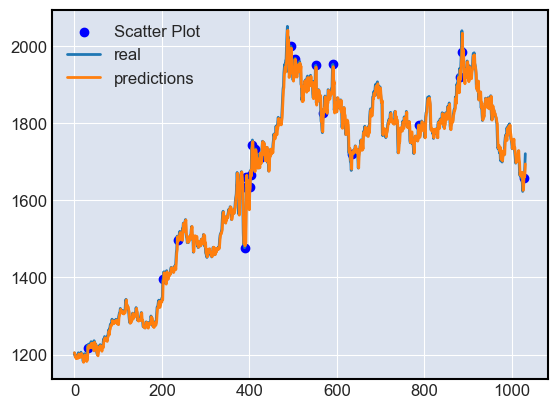

In [582]:
#Examination of the above proposed strategy
#Why does this plt method work that layers the pct_chg > .02 over the predictions and real price values, but the above plotly does not?
validation['pct_chg']=validation['Predictions'].pct_change()
selected_indices = validation[validation['pct_chg'] > 0.02].index

# Create a scatter plot
plt.scatter(selected_indices, validation.loc[selected_indices, 'Close'], marker='o', color='blue', label='Scatter Plot')
plt.plot(validation.Close, label='real')
plt.plot(validation.Predictions, label='predictions')
plt.legend()
plt.show()

In [ ]:
PERFORMANCE METRICS REVIEW

ARIMA
Train RMSE: RMSE: 13.9
Train MAE: MAE: 8.76
Test RMSE: 53.37952273665021
Test MAE: 43.46999918619792
        
ARIMA (log prices)
Test RMSE: 38.269807061034605
Test MAE: 30.85000406901031

SARIMA: 
Test RMSE - 62.87
Test MAE - 52.36

LSTM:
Test RMSE: 17.185049539220337
Test MAE: 11.97571214779403

CONCLUSION: 
- Both ARIMA and LSTM (in this case study) do not offer productive signals to buy or sell an instrument. Even if both models cling and adhere to real prices to a close degree, it is still impossible to ascertain whether models price predictions will be higher or lower than actual price in the future.
- For the reasons stipulated in the Context and Limitations section, ARIMA and LSTM (in this case study) do not seem to offer accurate frameworks to capture the dynamic equilibriums of publicly tradable markets, althought there are many other potential routes to investigate

RECOMMENDATIONS TO CONSIDER:
- Market psychology figures prominently into the markets. Coinciding with the frameworks of behavioral finance, diverse pricing equilibriums are established via different underlying trading psychologies, and the distinct price actions that set each equilbrium can be categorized into different states. 
- For instance, when uncertainty hits the markets, markets are characterized by wild volatility before an eventual equilibrium is reached. When prices are certain, markets are characterized by trending markets. 
- Categorizing market conditions into these two distinct states alone will obfuscate and confuse the current ARIMA and LSTM models (in this case study), for the models assume IID / stationarity etc, and will not compute distinctions across datapoints between uncertain vs certain market conditions with disparate market-particpant psychologies and dissimilar resulting price actions, whether within intraday time windows or over longer time horizons.  
- There may be other mathematical structures that more accurately frame market conditions, such as Hidden Markov Models that delineate transitions between states.
- Additionally, the preliminary MA crossover results buttress the hypothesis of market states. The MA crossover strategy suggests markets settle into distinct states, which then result in trending states under certain conditions. 
    - This further explains why stochastic-based models such as ARIMA (in this case study) fail.